In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
data = np.loadtxt('mi_timesteps.txt', skiprows=1001)

In [3]:
def takensEmbedding(data, delay, dimension):   
    embeddedData = np.array([data[0:len(data)-delay*dimension]])
    for i in range(1, dimension):
        embeddedData = np.append(embeddedData, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)
    return embeddedData

In [4]:
embedded = takensEmbedding(data[:,range(1,4)], 350, 39)
# flatten data 351 * 3 = 1053
flattened = np.empty((embedded.shape[0], embedded.shape[1]*embedded.shape[2]))
for i in range(embedded.shape[0]):
    flattened[i] = embedded[i].flatten()
flattened.shape

(39, 1053)

<IPython.core.display.Javascript object>


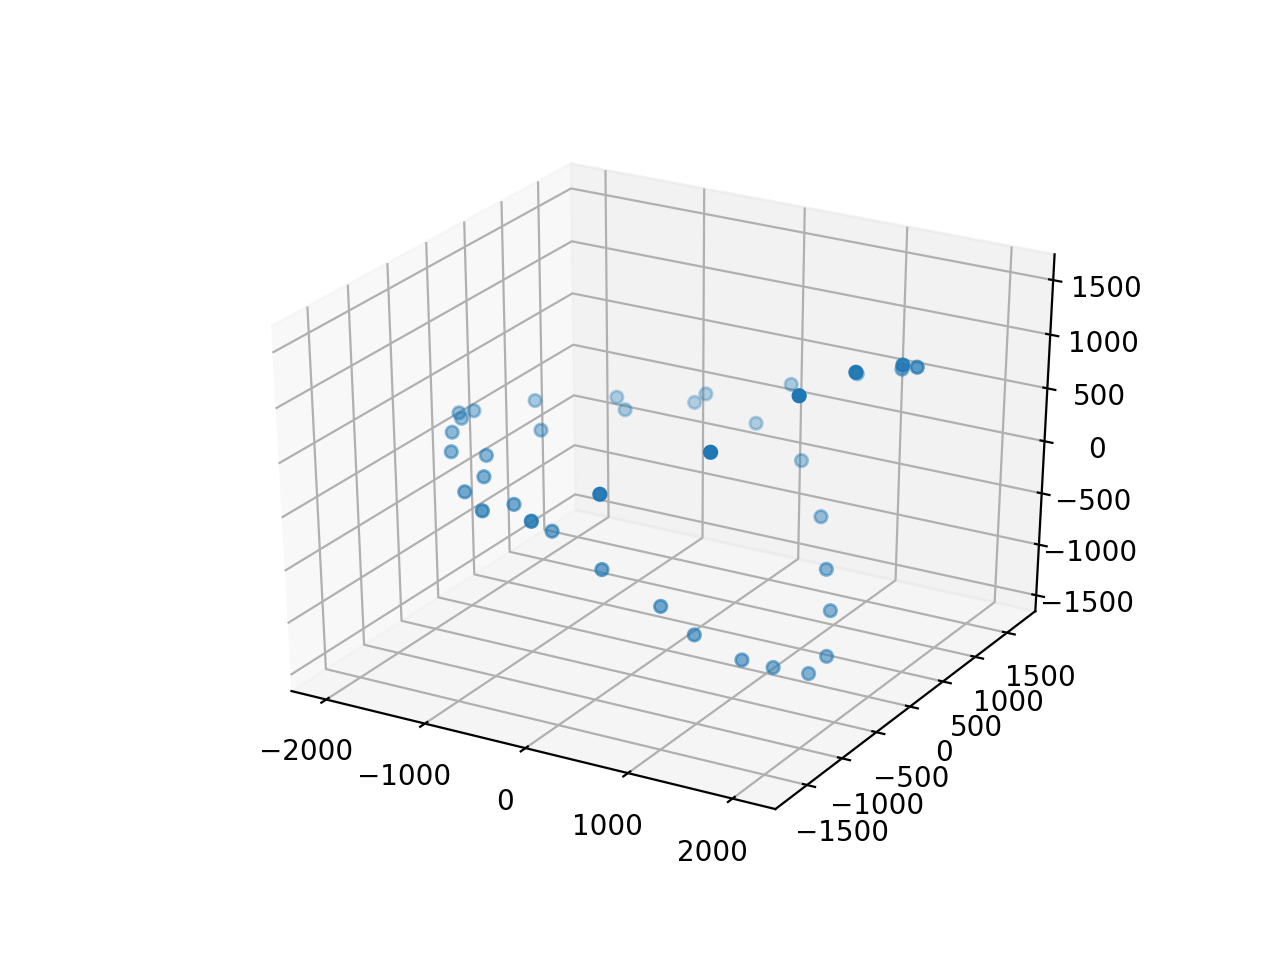

In [5]:
# demean
flattened = flattened - np.mean(flattened, axis=0)
# apply PCA
pca = PCA(n_components=3)
transformed_3d = pca.fit_transform(flattened)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_3d[:,0], transformed_3d[:,1], transformed_3d[:,2])

<IPython.core.display.Javascript object>


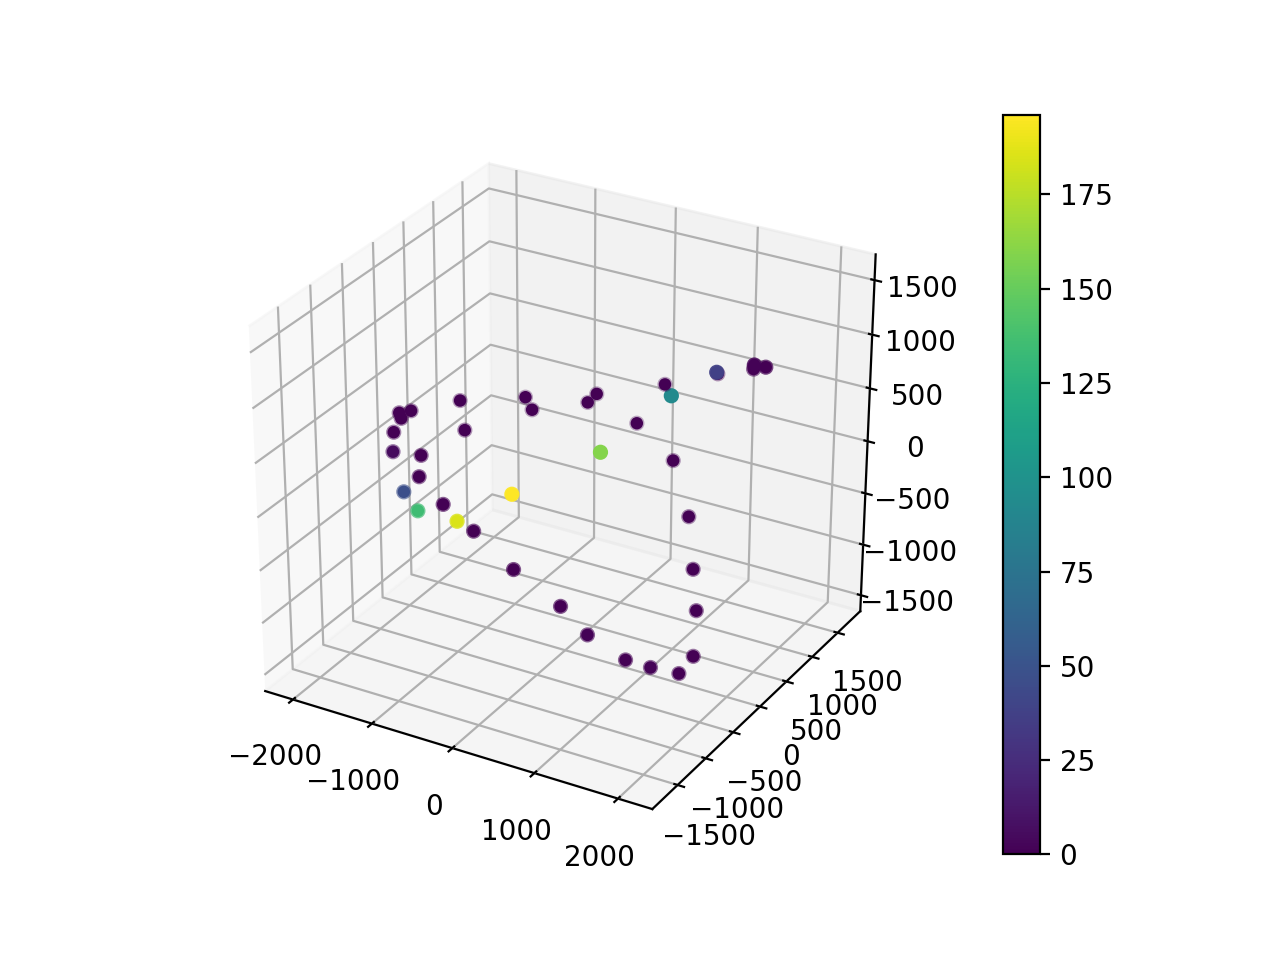

<IPython.core.display.Javascript object>


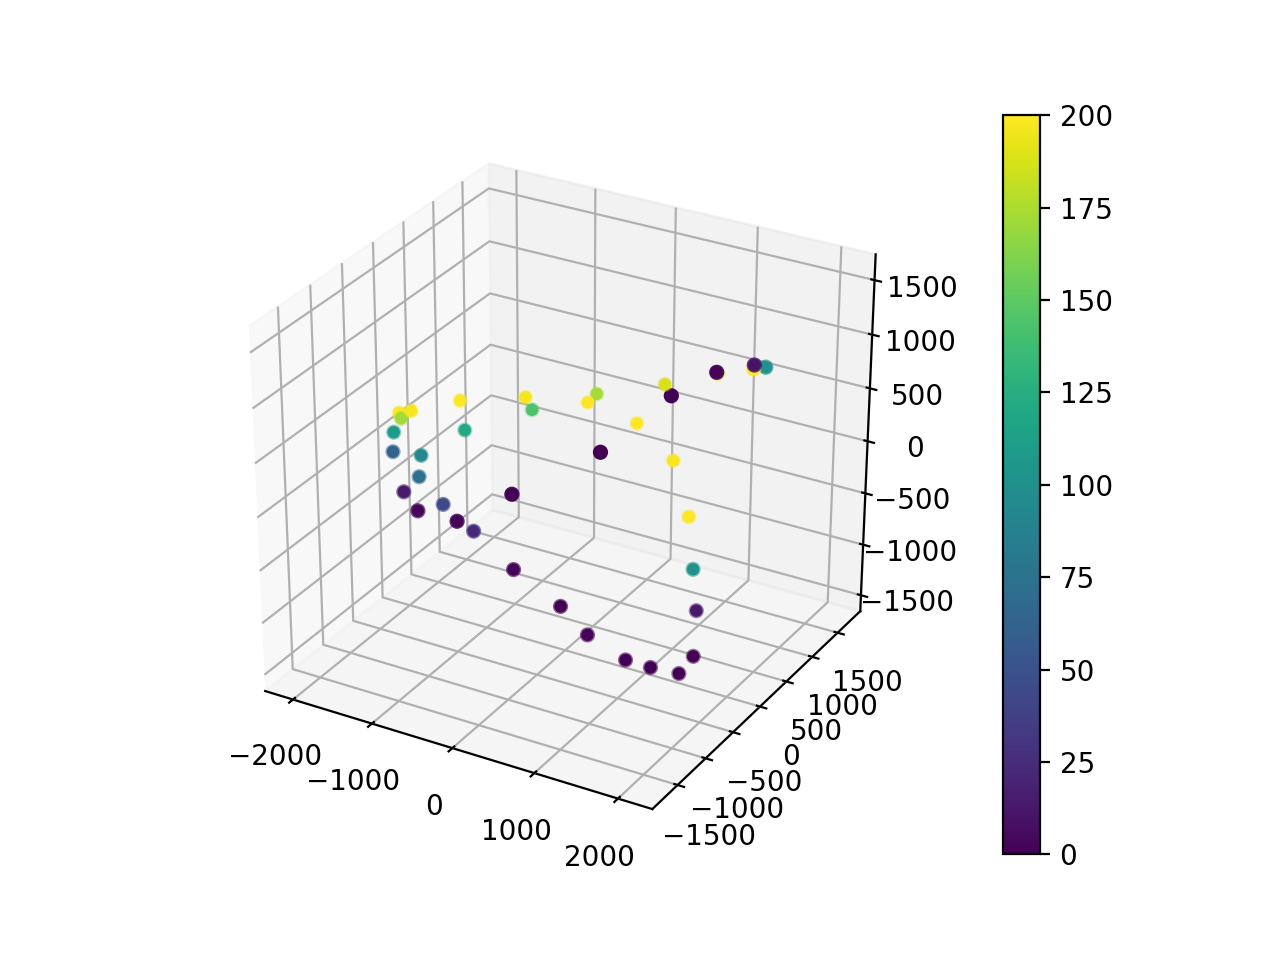

<IPython.core.display.Javascript object>


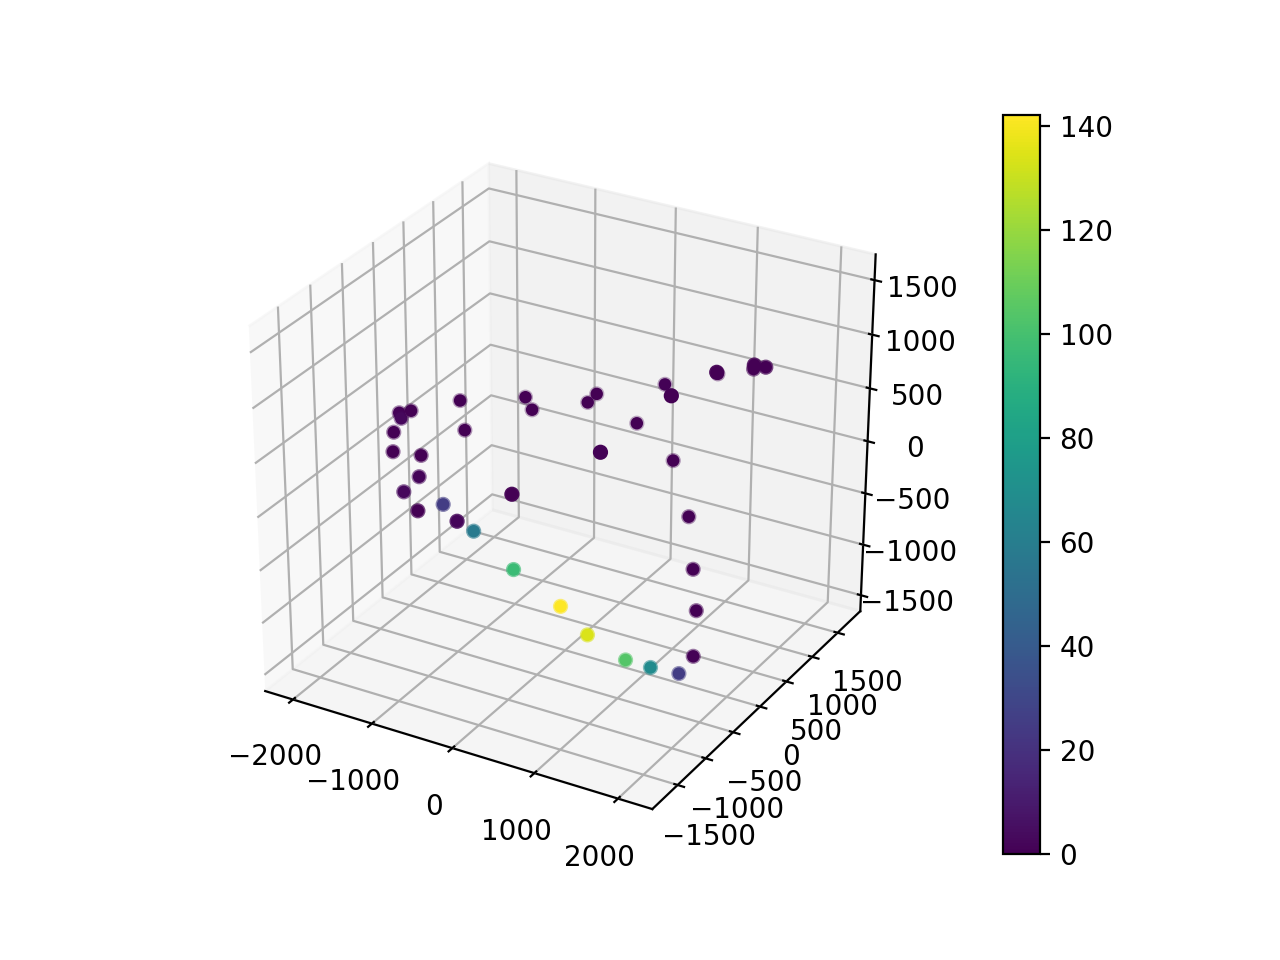

<IPython.core.display.Javascript object>


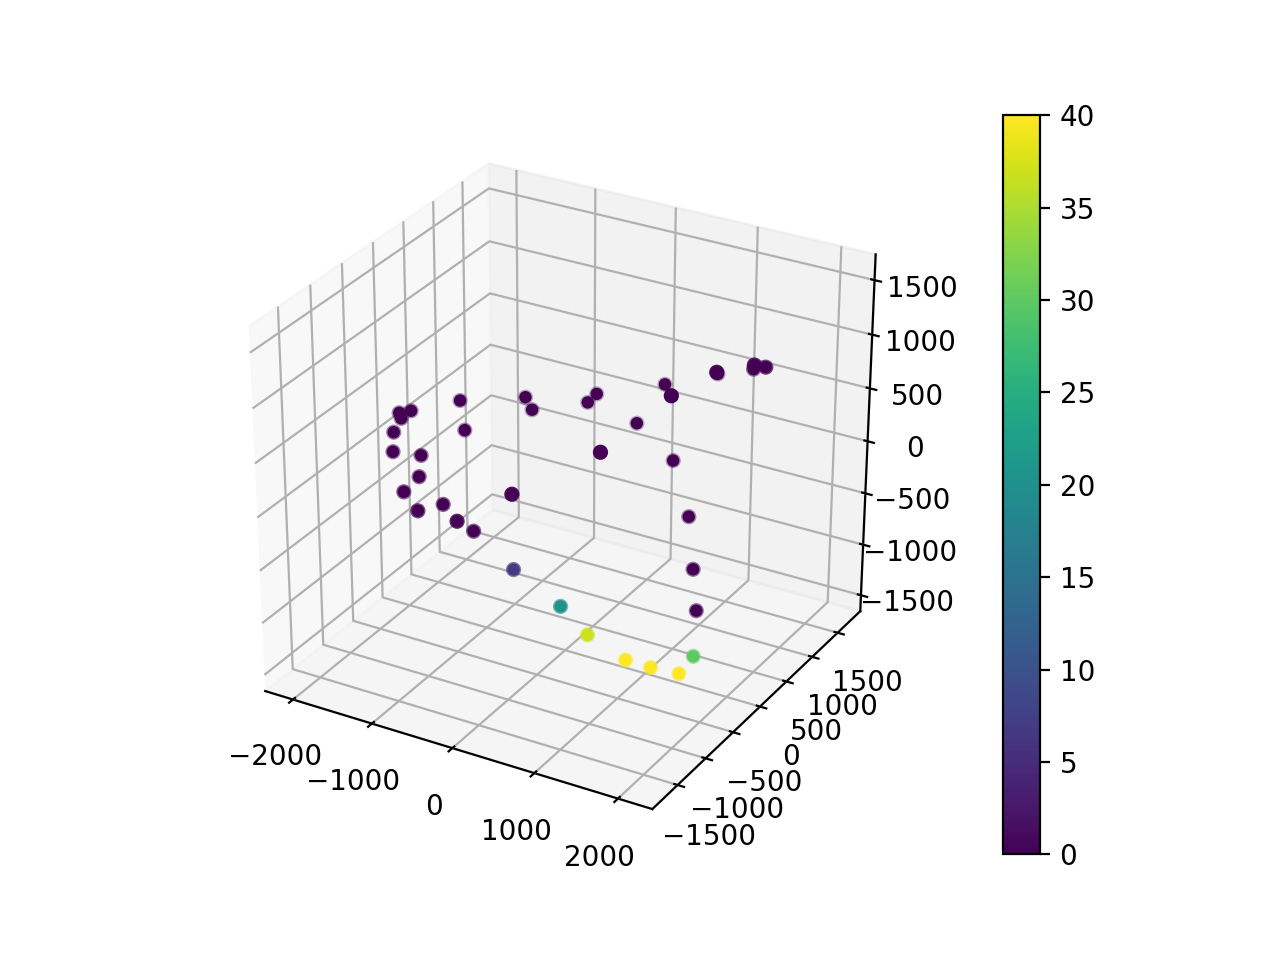

<IPython.core.display.Javascript object>


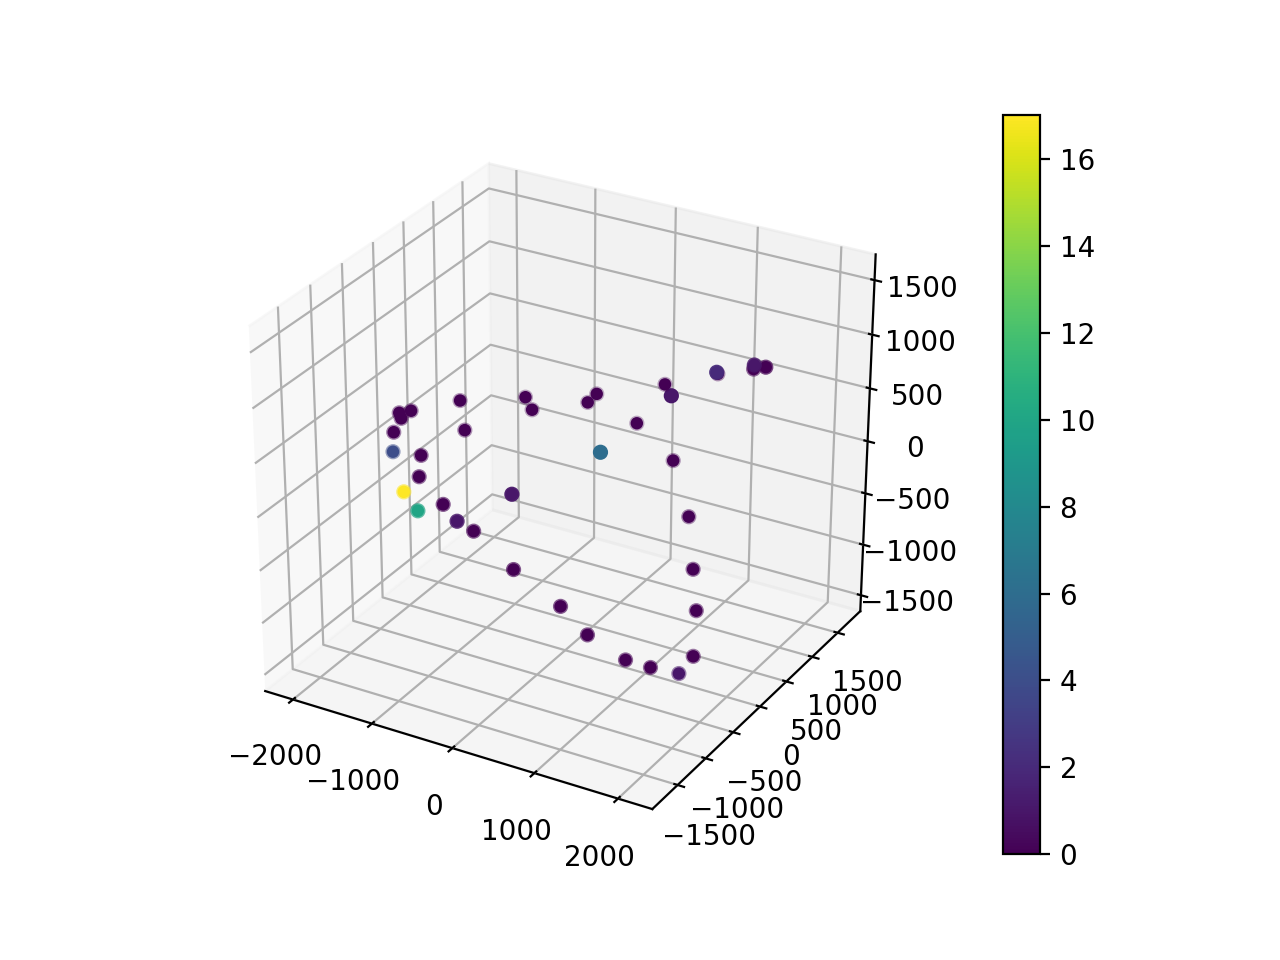

<IPython.core.display.Javascript object>


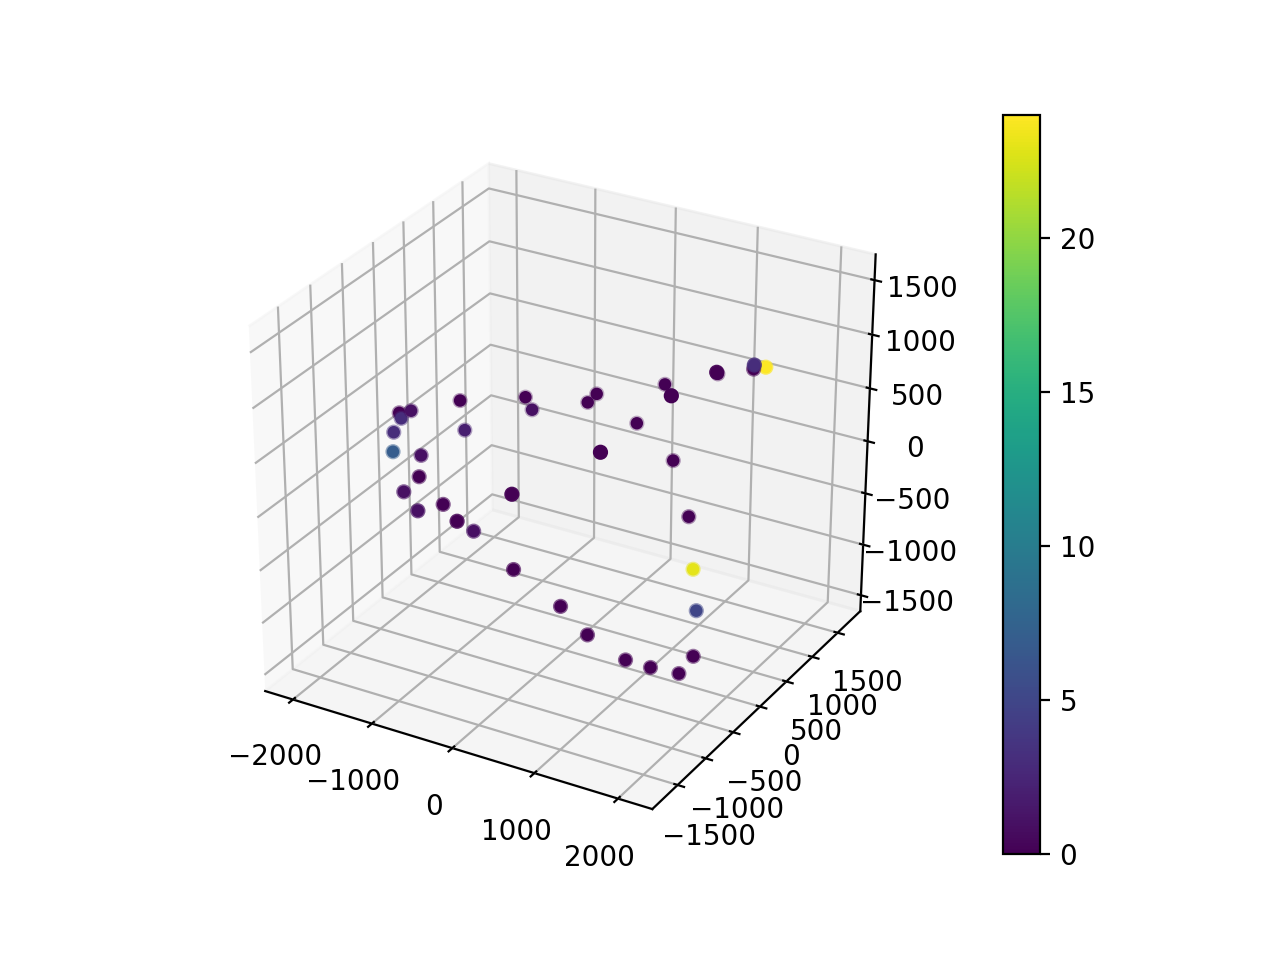

<IPython.core.display.Javascript object>


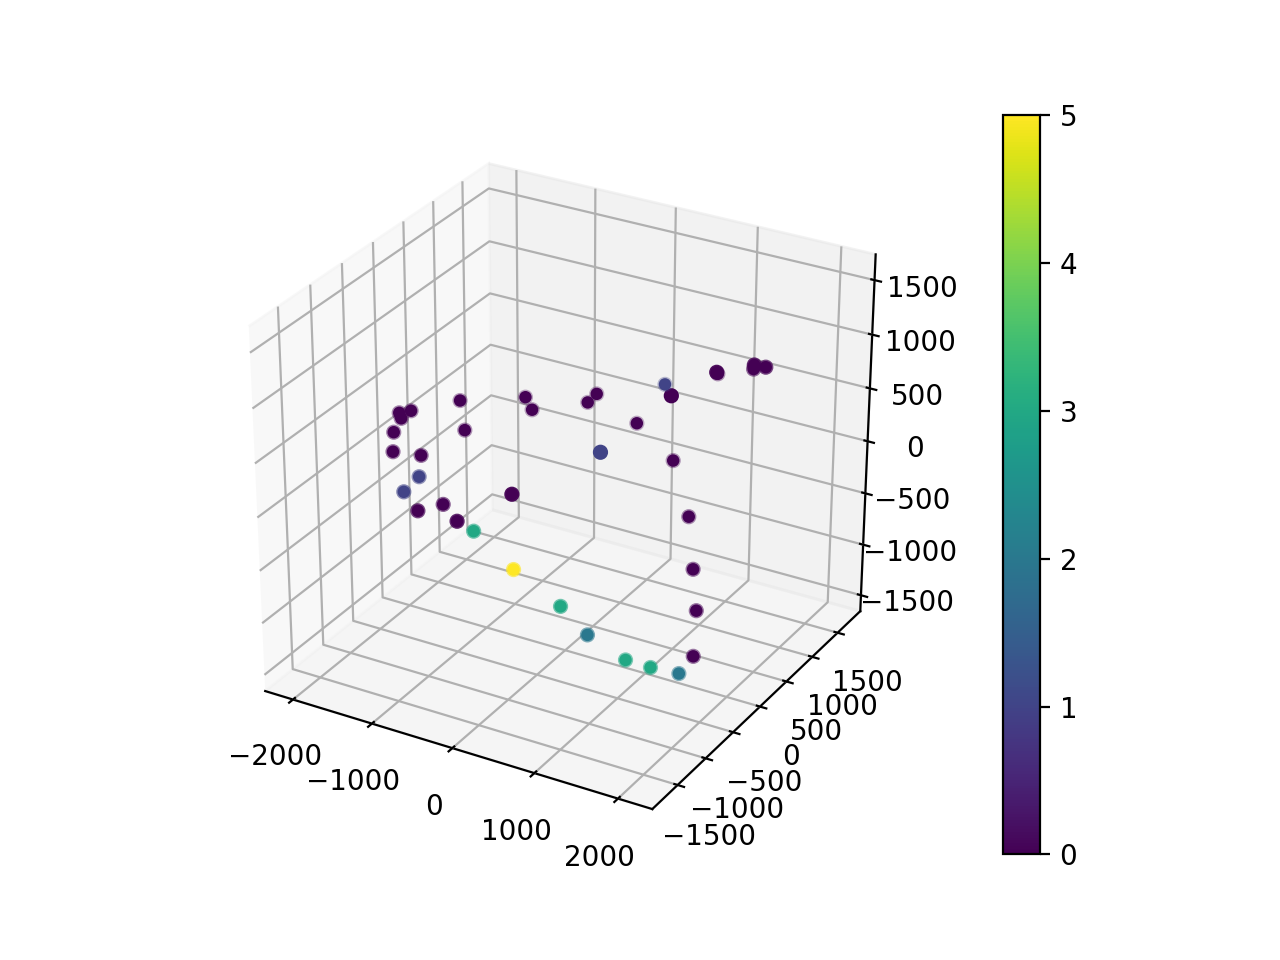

<IPython.core.display.Javascript object>


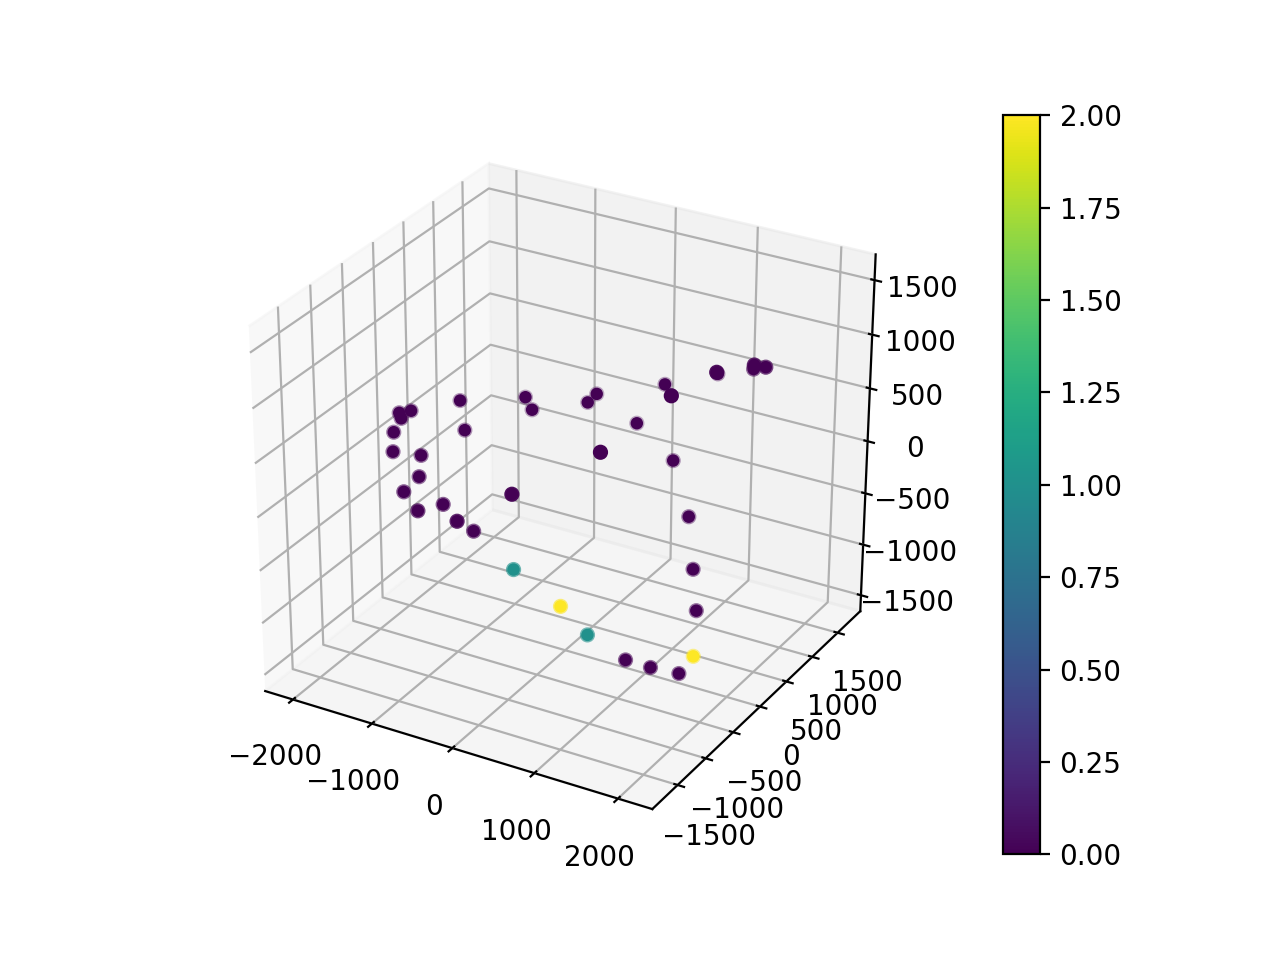

<IPython.core.display.Javascript object>


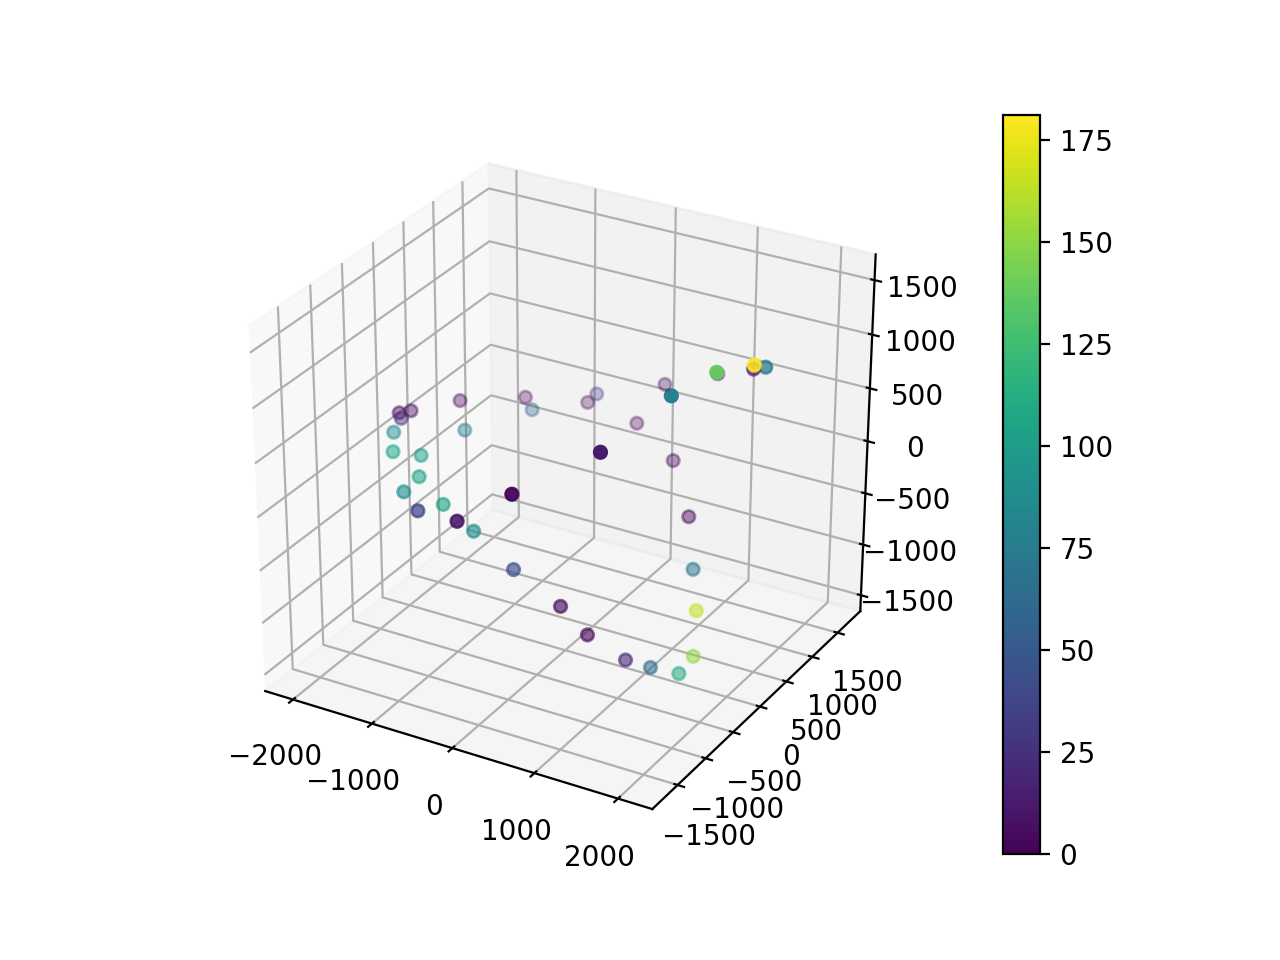

In [6]:
# collect points for first rows of windows
points = np.empty((39, 9))
for i in range(39):
    points[i] = data[i*350, range(1,10)]

# plot with color    
for i in range(9):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(transformed_3d[:,0], transformed_3d[:,1], transformed_3d[:,2], c=points[:,i])
    fig.colorbar(p)